## Problem Statement
Forecasting the number of views to the pages so that you can predict and optimize the ad placement for your clients.

We are provided with the data of 145k wikipedia pages and daily view count for each of them.

The clients belong to different regions and need data on how their ads will perform on pages in different languages.

In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
import re
import os
import seaborn as sns
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
!gdown 1RPOLd_74kMrpkTg35X843hOrZIsSJSMF

Downloading...
From: https://drive.google.com/uc?id=1RPOLd_74kMrpkTg35X843hOrZIsSJSMF
To: /content/train_1.csv
100% 278M/278M [00:04<00:00, 59.8MB/s]


In [4]:
train = pd.read_csv('train_1.csv')

In [5]:
train.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


#### Checking for reasons for null values

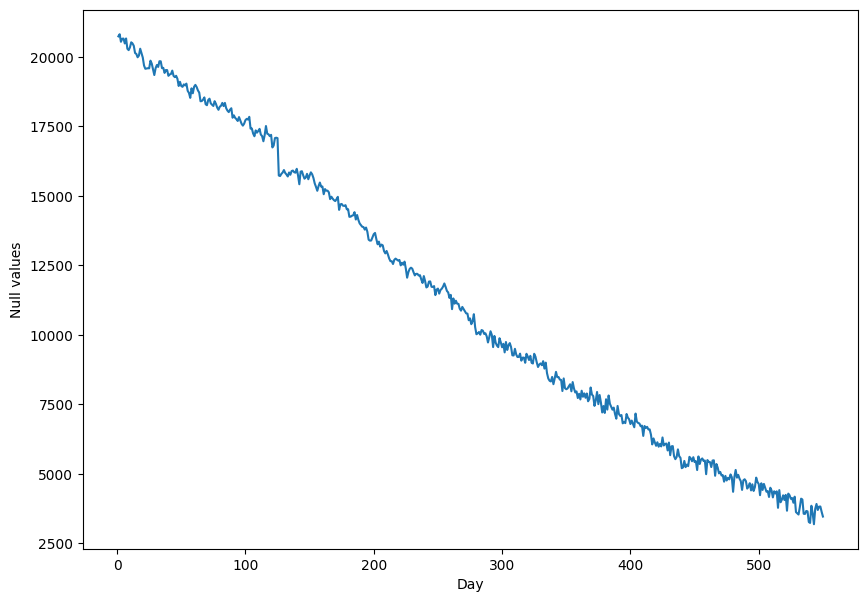

In [6]:
days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])

The null values are decreasing over time. So null values are caused because some pages were not created from the beginning.

#### Treating null values

In [7]:
train=train.dropna(how='all')
train=train.dropna(thresh=356)

In [8]:
train=train.fillna(0)
train.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
144994,Lucía_Hoyos_es.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,1.0,3.0,13.0,6.0,11.0,1.0,0.0,1.0
144995,XXx_(película)_es.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,4.0,3.0,2.0,12.0,2.0,5.0,4.0,6.0,4.0
144996,¿Volverías_con_tu_ex?_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,7.0,16.0,3.0,3.0,41.0,17.0,1.0,1.0,1.0
144997,Alicia_a_través_del_espejo_(película)_es.wikip...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,24.0,7.0,17.0,9.0,25.0,9.0,5.0,0.0,13.0
144999,El_libro_de_la_selva_(película_de_2016)_es.wik...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,11.0,12.0,19.0,11.0,5.0,10.0,2.0,6.0,4.0


## EDA

In [9]:
def split_page(page):
  w = re.split('_|\.', page)

  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(train.Page.apply(split_page))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

In [10]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,A'N'D,zh,all-access,spider


<Axes: xlabel='Language', ylabel='count'>

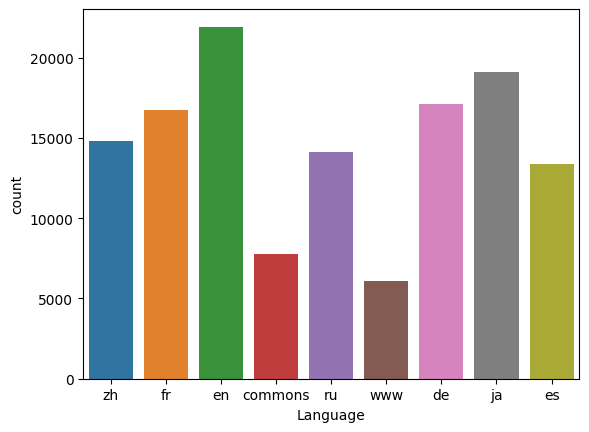

In [13]:
language_counts = df['Language'].value_counts()

# Create a count plot
sns.countplot(data=df, x='Language')

<Axes: xlabel='Access_type', ylabel='count'>

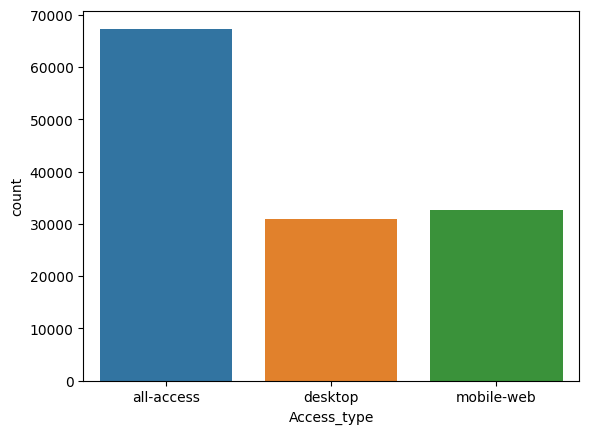

In [15]:
language_counts = df['Access_type'].value_counts()

# Create a count plot
sns.countplot(data=df, x='Access_type')




<Axes: xlabel='Access_origin', ylabel='count'>

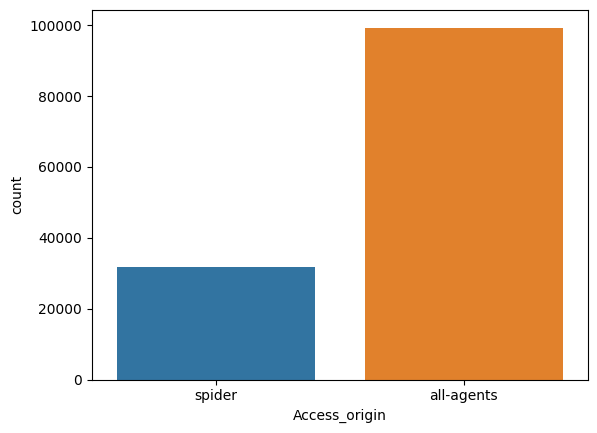

In [17]:
language_counts = df['Access_origin'].value_counts()

# Create a count plot
sns.countplot(data=df, x='Access_origin')

In [18]:
df.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
commons,7213,7213,7213,7213,7213,7213,7213,7213,7213,7213,...,7213,7213,7213,7213,7213,7213,7213,7778,7778,7778
de,15505,15505,15505,15505,15505,15505,15505,15505,15505,15505,...,15505,15505,15505,15505,15505,15505,15505,17123,17123,17123
en,19744,19744,19744,19744,19744,19744,19744,19744,19744,19744,...,19744,19744,19744,19744,19744,19744,19744,21938,21938,21938
es,11516,11516,11516,11516,11516,11516,11516,11516,11516,11516,...,11516,11516,11516,11516,11516,11516,11516,13397,13397,13397
fr,14630,14630,14630,14630,14630,14630,14630,14630,14630,14630,...,14630,14630,14630,14630,14630,14630,14630,16717,16717,16717
ja,17172,17172,17172,17172,17172,17172,17172,17172,17172,17172,...,17172,17172,17172,17172,17172,17172,17172,19115,19115,19115
ru,12329,12329,12329,12329,12329,12329,12329,12329,12329,12329,...,12329,12329,12329,12329,12329,12329,12329,14109,14109,14109
www,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,...,5530,5530,5530,5530,5530,5530,5530,6078,6078,6078
zh,14187,14187,14187,14187,14187,14187,14187,14187,14187,14187,...,14187,14187,14187,14187,14187,14187,14187,14791,14791,14791


In [19]:
#here we see that the languages are not treated properly as there are commons and www

In [20]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        return val[0][0:2]

    return 'no_lang'

df['Language']=df['Page'].apply(lambda x: lang(str(x)))

In [21]:
df.groupby('Language').count() #now the count has increased. You can go back and get it sorted

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
de,17123,17123,17123,17123,17123,17123,17123,17123,17123,17123,...,17123,17123,17123,17123,17123,17123,17123,12860,12860,12860
en,21938,21938,21938,21938,21938,21938,21938,21938,21938,21938,...,21938,21938,21938,21938,21938,21938,21938,21938,21938,21938
es,13397,13397,13397,13397,13397,13397,13397,13397,13397,13397,...,13397,13397,13397,13397,13397,13397,13397,10028,10028,10028
fr,16717,16717,16717,16717,16717,16717,16717,16717,16717,16717,...,16717,16717,16717,16717,16717,16717,16717,15909,15909,15909
ja,19115,19115,19115,19115,19115,19115,19115,19115,19115,19115,...,19115,19115,19115,19115,19115,19115,19115,14335,14335,14335
no_lang,13856,13856,13856,13856,13856,13856,13856,13856,13856,13856,...,13856,13856,13856,13856,13856,13856,13856,27076,27076,27076
ru,14109,14109,14109,14109,14109,14109,14109,14109,14109,14109,...,14109,14109,14109,14109,14109,14109,14109,14109,14109,14109
zh,14791,14791,14791,14791,14791,14791,14791,14791,14791,14791,...,14791,14791,14791,14791,14791,14791,14791,14791,14791,14791


In [22]:
df_language=df.groupby('Language').mean().transpose()
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,774.426269,3861.418270,1140.148541,505.989352,620.425007,107.428551,670.765965,280.230884
2015-07-02,763.878176,3848.940651,1089.566843,509.238500,712.459639,112.593533,682.374796,280.646745
2015-07-03,733.166910,3654.264017,1002.042323,489.659688,643.454355,106.425664,632.463605,278.785275
2015-07-04,672.798867,3804.480354,940.835112,523.400191,808.439236,90.827223,594.882132,281.481036
2015-07-05,782.125153,3929.175312,1023.180190,513.872346,775.587654,100.659353,633.532072,300.263944
...,...,...,...,...,...,...,...,...
2016-12-27,1123.751153,6415.150971,1078.762559,846.143028,808.217578,161.744515,1007.479977,364.880738
2016-12-28,1066.064241,6208.003464,1117.616705,774.151223,807.662046,186.088770,953.722801,371.549185
2016-12-29,1036.503358,6630.178002,1067.152571,757.718610,885.257233,157.015156,917.736339,342.295788
2016-12-30,986.052678,5490.552740,813.258789,712.405097,981.830133,162.524682,822.712028,344.481847


In [23]:
df_language.reset_index(inplace=True)
df_language.set_index('index', inplace=True)

Text(0, 0.5, 'Views per Page')

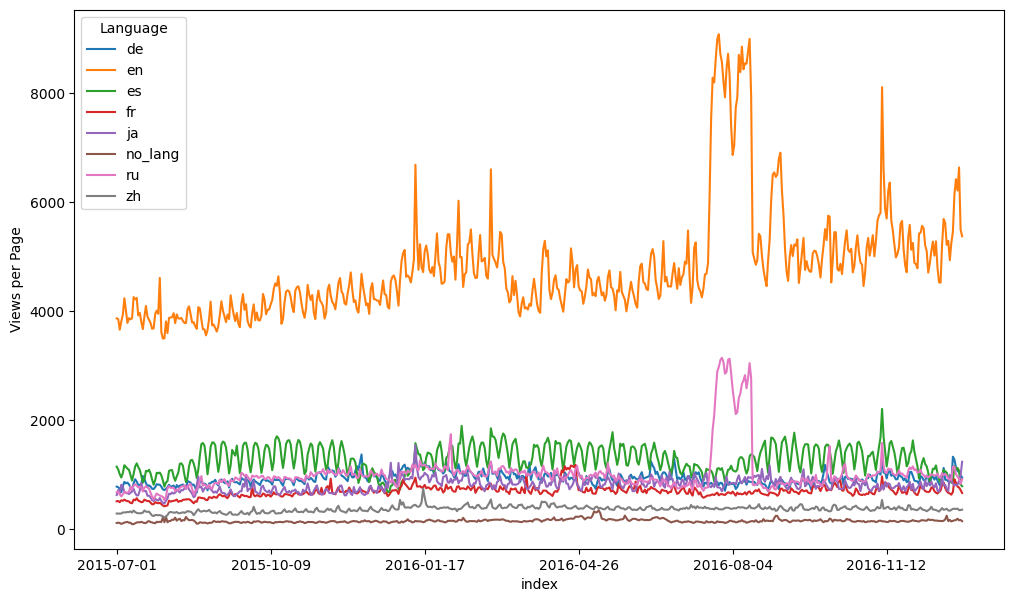

In [24]:
df_language.plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [25]:
## English gets most amount of views followed by spanish

Text(0, 0.5, 'Views per Page')

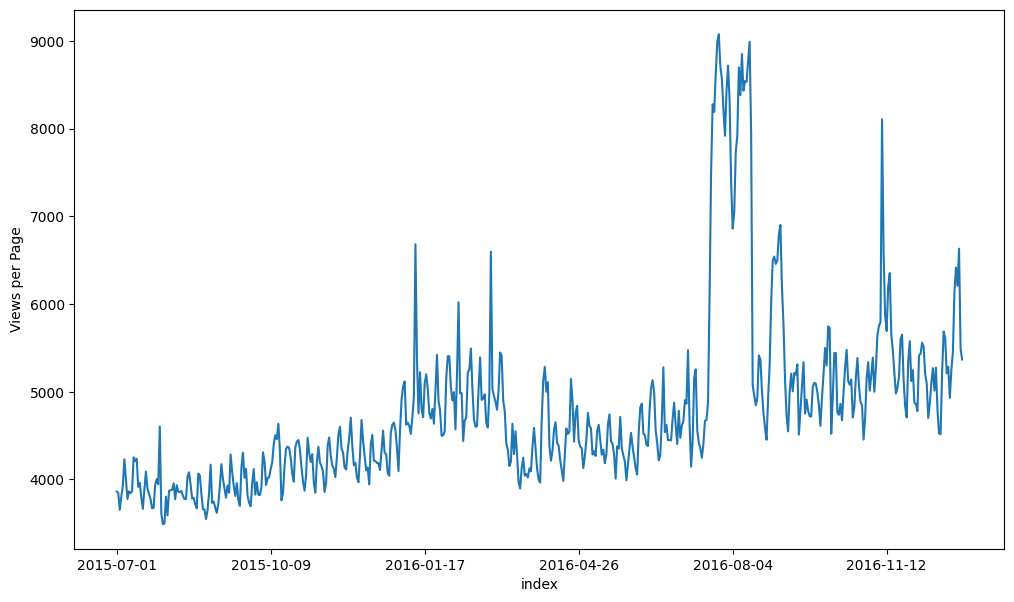

In [26]:
# printing English
df_language['en'].plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [27]:
total_view=df_language.copy()

##  Checking the stationarity


In [28]:
# Dickey-Fuller test

In [29]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])

df_test(total_view['en'])

ADF Stastistic: -2.403786
p-value: 0.140671


In [30]:
# We see that the p value is not low enough(<0.05). Therefore, we can say our series in not stationary as we fail to reject the null hypothesis

### Making the time series stationary

In [31]:
ts=total_view[['en']]

In [32]:
ts = ts.reset_index()

In [33]:
ts.index = pd.to_datetime(ts.index)

In [34]:
ts.set_index('index', inplace=True)

In [35]:
ts

Language,en
index,
2015-07-01,3861.418270
2015-07-02,3848.940651
2015-07-03,3654.264017
2015-07-04,3804.480354
2015-07-05,3929.175312
...,...
2016-12-27,6415.150971
2016-12-28,6208.003464
2016-12-29,6630.178002


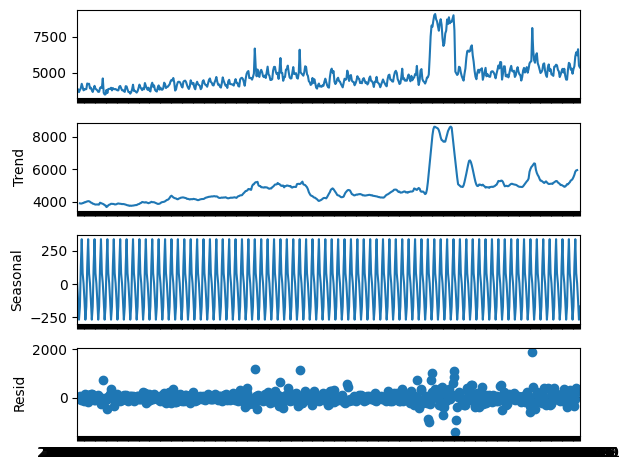

In [36]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(ts, period=7)  # Knowing the right period is V.Imp and You can use ACF to guess the period
model.plot();

<Axes: xlabel='index'>

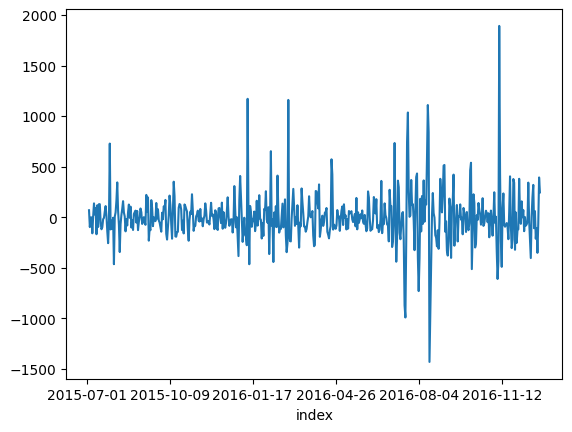

In [37]:
model.resid.plot()

In [38]:
df_test(model.resid.dropna())

ADF Stastistic: -11.435041
p-value: 0.000000


In [39]:
## We can see that aur series is now stationary, we can also try diffrencing to see what results we can get.

## Remove trend and seasonality with differencing

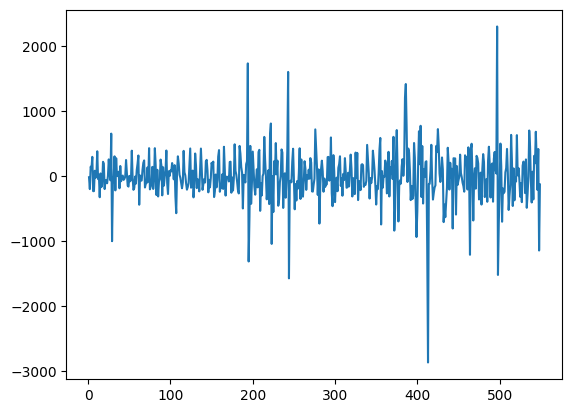

In [40]:
ts_diff = ts - ts.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [41]:
ts_diff.dropna(inplace=True)
df_test(ts_diff)

ADF Stastistic: -8.261352
p-value: 0.000000


In [42]:
#Also the p value is 0. So we can say that our graph is now stationery. Now we can apply the ARIMA model

### Plot the autocorreltaion and partial auto correlation functions

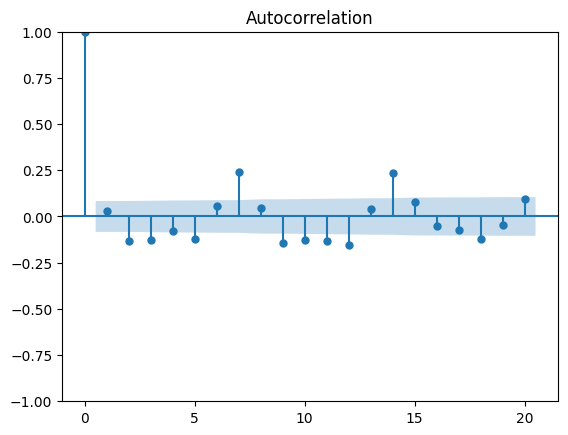

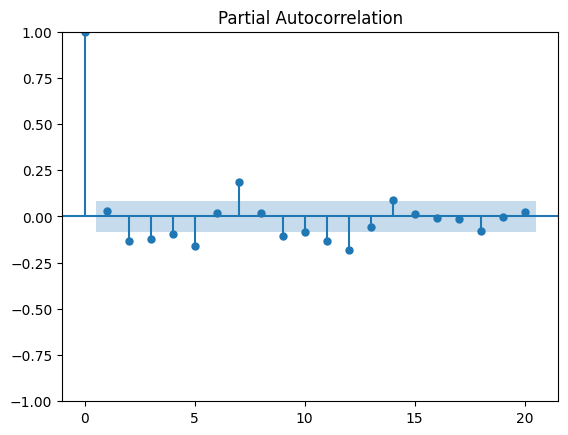

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

In [44]:
ts.diff(7) #

Language,en
index,
2015-07-01,NaN
2015-07-02,NaN
2015-07-03,NaN
2015-07-04,NaN
2015-07-05,NaN
...,...
2016-12-27,804.087291
2016-12-28,997.424970
2016-12-29,1346.841371


## ARIMA MODEL

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import DataFrame


In [46]:
model = SARIMAX(ts, order=(1,1,1))
model_fit = model.fit(disp=0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:
model_fit.predict(12)

2015-07-13    4210.297557
2015-07-14    4174.226495
2015-07-15    4197.775650
2015-07-16    3902.374198
2015-07-17    3945.629070
                 ...     
2016-12-27    6062.278727
2016-12-28    6317.880194
2016-12-29    6130.967200
2016-12-30    6516.814683
2016-12-31    5480.984400
Freq: D, Name: predicted_mean, Length: 538, dtype: float64

In [48]:
train = ts[:-20]
test = ts[-20:]

In [49]:
## In ARMA family models, for getting p (Auto-regressive order) we look at PACF plot, there is a cut-off at lag1 due to which it will be considered as the order of AR in ARMA. Similarly q(Moving Average order) will also be equal to 1 as the value of ACF at lag2 is significantly different from that at lag1. Therefore lag1 is also a cut-off point in ACF plot.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


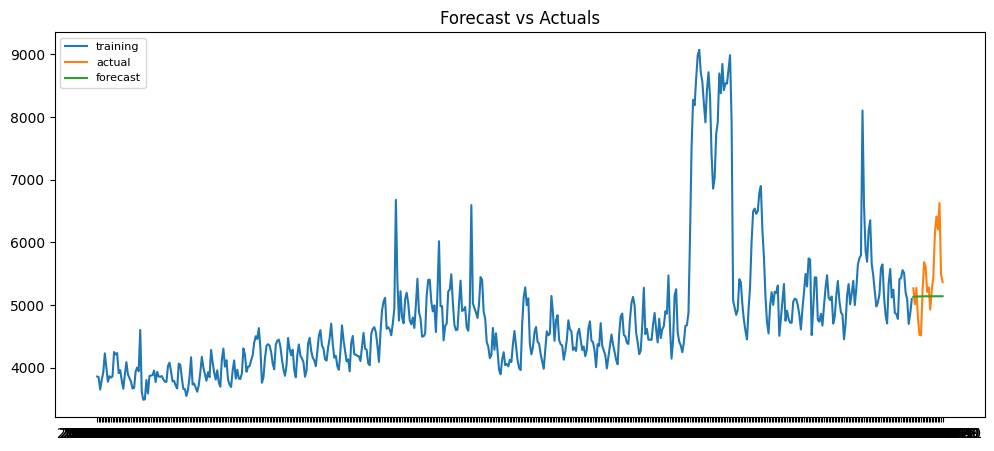

In [50]:
model = SARIMAX(train, order=(2, 1, 2))
fitted = model.fit(disp=-1)

# Forecast
fc = fitted.forecast(20, alpha=0.02)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [51]:
mape = np.mean(np.abs(fc.values - test.values)/np.abs(test.values))
rmse = np.mean((fc.values - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.08213219335167705
rsme: 624.4451158083979


### using exogenous data

In [52]:
ex_df = pd.read_csv('Exog_Campaign_eng.csv')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [53]:
exog=ex_df['Exog'].to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


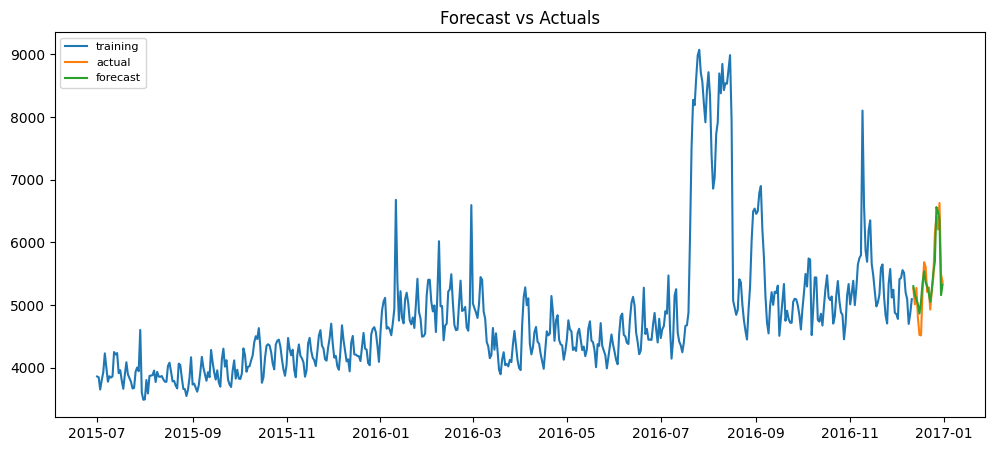

In [54]:
import statsmodels.api as sm
train=ts[:530]
test=ts[530:]
model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,7),exog=exog[:530])
results=model.fit()

fc=results.forecast(20,dynamic=True,exog=pd.DataFrame(exog[530:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [55]:
mape = np.mean(np.abs(fc.values - test.values)/np.abs(test.values))
rmse = np.mean((fc.values - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.10347693827344548
rsme: 737.5231800914678


## Facebook Prophet

In [56]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [57]:
ts_df = ts.reset_index().copy()
ts_df.columns = [['ds', 'y']]

In [58]:
df2=ts_df.copy()
df2['exog'] = exog
df2.columns = ['ds', 'y', 'exog']
df2.head()

,ds,y,exog
0,2015-07-01,3861.418270,0
1,2015-07-02,3848.940651,0
2,2015-07-03,3654.264017,0
3,2015-07-04,3804.480354,0
4,2015-07-05,3929.175312,0


In [59]:
df2[:-20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      530 non-null    object 
 1   y       530 non-null    float64
 2   exog    530 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.5+ KB


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbugd82zr/bihxspqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbugd82zr/ewtm9c_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19574', 'data', 'file=/tmp/tmpbugd82zr/bihxspqn.json', 'init=/tmp/tmpbugd82zr/ewtm9c_l.json', 'output', 'file=/tmp/tmpbugd82zr/prophet_model92hqy3a1/prophet_model-20230928175519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


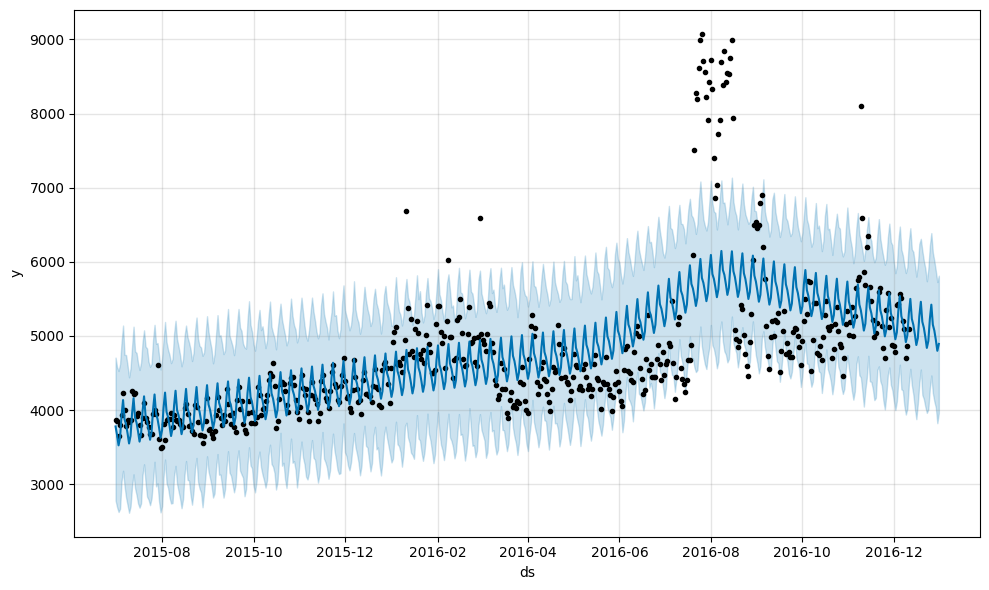

In [60]:
from prophet import Prophet
m = Prophet(weekly_seasonality=True)
m.fit(df2[['ds', 'y']][:-20])
future = m.make_future_dataframe(periods=20,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbugd82zr/b44qqhs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbugd82zr/6mz6nkr4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63734', 'data', 'file=/tmp/tmpbugd82zr/b44qqhs1.json', 'init=/tmp/tmpbugd82zr/6mz6nkr4.json', 'output', 'file=/tmp/tmpbugd82zr/prophet_model_ejkvmlw/prophet_model-20230928175519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


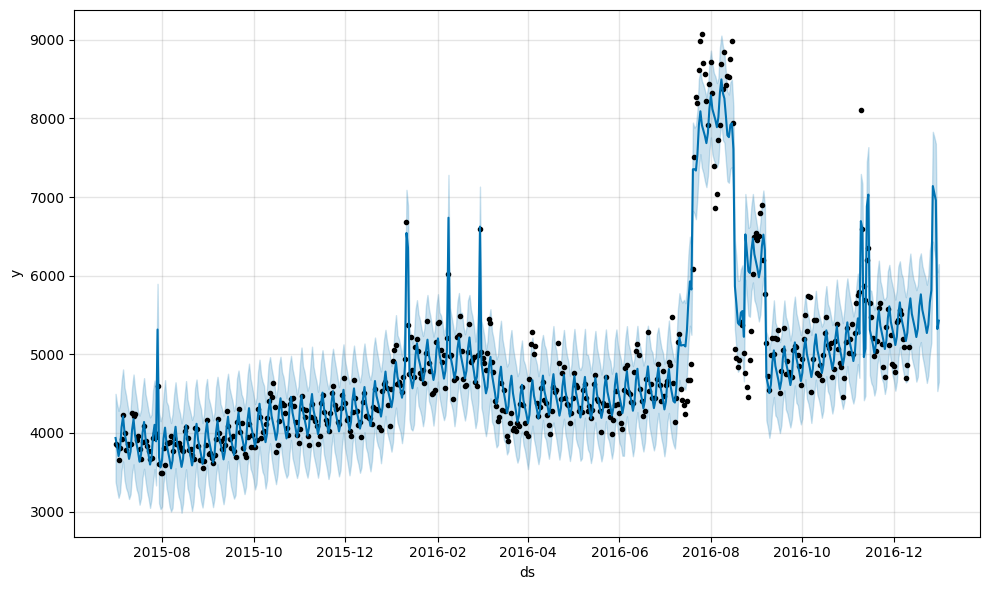

In [61]:
model2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)
model2.add_regressor('exog')
model2.fit(df2[:-20])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

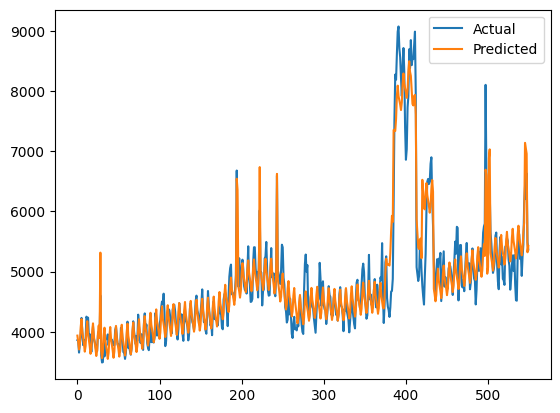

In [62]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

plot.plot(y_true, label='Actual')
plot.plot(y_pred, label='Predicted')
plot.legend()
plot.show()

In [63]:
mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

mape: 0.06757807513038254


## Questionnaire

#### 1. Defining the problem statements and where can this and modifications of this be used?

Forecasting the number of views to the pages so that you can predict and optimize the ad placement for your clients.

The same can be used for predicting the future sale in a online store, predicting the using pattern of streaming app etc.

#### 2. Write 3 inferences you made from the data visualizations

The amount of null values decresing over the time. This is because some website were not there from start

There the more number of pages in English Language

The desktop and mobile user are almost similar

#### 3. What does the decomposition of series do?

Decomposition remove trend and seasonlity from the time series data.

#### 4. What level of differencing gave you a stationary series?

1 level of differening gave a stationary data

#### 5. Difference between arima, sarima & sarimax.

ARIMA is a basic time series forecasting model that consist of three main component; AutoRegressive (AR), Moving Average (MA) and Residual

SARIMA is an extension of ARIMA model that takes into account easonlity in time series data

SARIMAX is an extensioin of SARIMA that allows for the inclusion of exogenous variable which are external factors that can influence the time series

#### 6. Compare the number of views in different languages

Large number of viewers are English speaking

Followed by Chinese and Spanish

#### 7. What other methods other than grid search would be suitable to get the model for all languages?

Random serach

Bayesian Optimization
